# Validated Taylor models: Gritton's polynomial

In [1]:
using PyPlot

**NOTE** Current version of [TaylorSeries.jl](https://github.com/JuliaDiff/TaylorSeries.jl) (master, commit 3d9ba8f) does not yield the proper *output* when the series is displayed. Use the version in branch "printing2" to the proper output displayed.

In [2]:
Pkg.checkout("TaylorSeries", "printing2")

INFO: Checking out TaylorSeries printing2...
fatal: Cannot update paths and switch to branch 'printing2' at the same time.
Did you intend to checkout 'origin/printing2' which can not be resolved as commit?


LoadError: LoadError: failed process: Process(`git --work-tree=/Users/blaskolic/.julia/v0.4/TaylorSeries --git-dir=/Users/blaskolic/.julia/v0.4/TaylorSeries/.git checkout -q -B printing2 -t origin/printing2`, ProcessExited(128)) [128]
while loading In[2], in expression starting on line 1

In [3]:
# Load TaylorSeries *first* and then ValidatedNumerics
using TaylorSeries
using ValidatedNumerics

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 [inlined code] from /Users/blaskolic/.julia/v0.4/TaylorSeries/src/Taylor1.jl:127
 in anonymous at no file:0
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/blaskolic/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/blaskolic/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/blaskolic/.julia/v0.4/TaylorSeries/src/Taylor1.jl, in expression starting on line 143
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 [inlined code] from /Users/blaskolic/.julia/v0.4/TaylorSeries/src/Taylor1.jl:127
 in anonymous at no file:0
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304

In [4]:
# This is an abbreviation used somewhere below
const t1v = taylor1_variable

taylor1_variable (generic function with 4 methods)

In [5]:
methods(taylor1_variable)

# 4 methods for generic function "taylor1_variable":
taylor1_variable() at /Users/blaskolic/.julia/v0.4/TaylorSeries/src/Taylor1.jl:50
taylor1_variable(T::Type{T}) at /Users/blaskolic/.julia/v0.4/TaylorSeries/src/Taylor1.jl:49
taylor1_variable(T::Type{T}, order::Int64) at /Users/blaskolic/.julia/v0.4/TaylorSeries/src/Taylor1.jl:49
taylor1_variable(order::Int64) at /Users/blaskolic/.julia/v0.4/TaylorSeries/src/Taylor1.jl:50

## Gritton's second problem

### The problem

The following example is based on a talk by R. Baker Kearfott (http://www.mat.univie.ac.at/~neum/glopt/mss/Kea00.pdf). It illustrates that the overestimation induced by Interval Arithmetics can be somewhat controlled by using Taylor expansions locally, that is, "higher-order multivariate Taylor models can lead to much tighter bounds".

Then, the goal is to obtain *sharp bounds* of an 18th-degree real polynomial of interest in a chemical engineering problem in a specific interval. In this example, the interval of interest is $x_I = [1.35, 1.37]$.

Gritton's polynomial $p_G(x)$ is given by

\begin{eqnarray}
p_G(x) & = & −0.371936250000000 ∗ 10^{3}\\
     & + & x ∗ (−0.791246565600000 ∗ 10^{3}\\
     & + & x ∗ ( 0.404494414300000 ∗ 10^{4}\\
     & + & x ∗ ( 0.978137516700000 ∗ 10^{3}\\
     & + & x ∗ (−0.165478928000000 ∗ 10^{5}\\
     & + & x ∗ ( 0.221407282700000 ∗ 10^{5}\\
     & + & x ∗ (−0.932654935900000 ∗ 10^{4}\\
     & + & x ∗ (−0.351853687200000 ∗ 10^{4}\\
     & + & x ∗ ( 0.478253229600000 ∗ 10^{4}\\
     & + & x ∗ (−0.128147944000000 ∗ 10^{4}\\
     & + & x ∗ (−0.283443587500000 ∗ 10^{3}\\
     & + & x ∗ ( 0.202627091500000 ∗ 10^{3}\\
     & + & x ∗ (−0.161791345900000 ∗ 10^{2}\\
     & + & x ∗ (−0.888303902000000 ∗ 10^{1}\\
     & + & x ∗ ( 0.157558017300000 ∗ 10^{1}\\
     & + & x ∗ ( 0.124599084800000 ∗ 10^{0}\\
     & + & x ∗ (−0.358914862200000 ∗ 10^{−1}\\
     & + & x ∗ (−0.195109557600000 ∗ 10^{−3}\\
     & + & x ∗ ( 0.227468222900000 ∗ 10^{−3} ))))))))))))))))))
\end{eqnarray}


In [8]:
"""This implements Gritton's 18th degree polynomial"""
function gritton_pol(x)
    p = -0.371936250000000 * 10.0^(3) + 
        x * (-0.791246565600000 * 10.0^(3) + 
        x * ( 0.404494414300000 * 10.0^(4) + 
        x * ( 0.978137516700000 * 10.0^(3) + 
        x * (-0.165478928000000 * 10.0^(5) + 
        x * ( 0.221407282700000 * 10.0^(5) + 
        x * (-0.932654935900000 * 10.0^(4) + 
        x * (-0.351853687200000 * 10.0^(4) + 
        x * ( 0.478253229600000 * 10.0^(4) + 
        x * (-0.128147944000000 * 10.0^(4) + 
        x * (-0.283443587500000 * 10.0^(3) + 
        x * ( 0.202627091500000 * 10.0^(3) + 
        x * (-0.161791345900000 * 10.0^(2) + 
        x * (-0.888303902000000 * 10.0^(1) + 
        x * ( 0.157558017300000 * 10.0^(1) + 
        x * ( 0.124599084800000 * 10.0^(0) + 
        x * (-0.358914862200000 * 10.0^(-1) + 
        x * (-0.195109557600000 * 10.0^(-3) + 
        x * ( 0.227468222900000 * 10.0^(-3) ))))))))))))))))))
    return p
end

gritton_pol (generic function with 1 method)

In [9]:
"""Plots a function `f` in a given interval `x_interval`, using `num_points`"""
function plot_f_interval(f::Function, x_interval::Interval, num_points=100)

    xv = linspace(x_interval.lo, x_interval.hi, num_points)
    fv = map(f, xv)

    plot(xv, fv, "b,")
    nothing
end

plot_f_interval (generic function with 2 methods)

The following is taken directly from the talk, about Gritton's second problem:

- An eighteenth degree polynomial arising from a chemical engineering problem.

- The problem has eighteen roots in the initial interval $[−12, 8]$.

- The root at $x \approx 1.381$ is difficult to isolate because of interval dependencies.

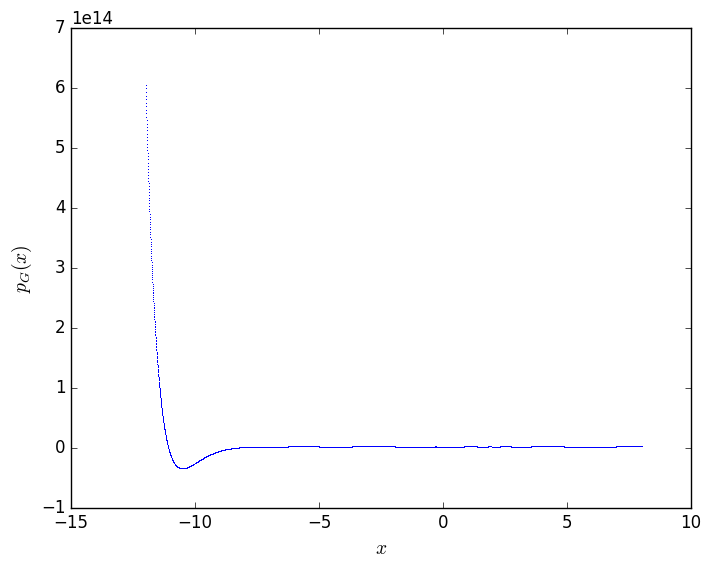

In [29]:
xlabel(L"x", size=14)
ylabel(L"p_G(x)", size=14)
plot_f_interval(gritton_pol, Interval(-12,8), 5000);

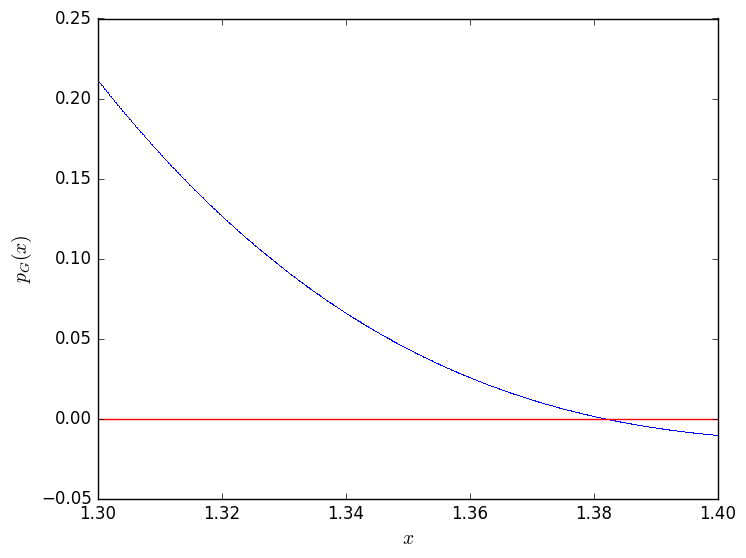

In [11]:
xlabel(L"x", size=14)
ylabel(L"p_G(x)", size=14)
plot_f_interval(gritton_pol, Interval(1.3,1.4), 1000)
plot([1.3,1.4], [0.0,0.0], "r-");

### Naive use of interval arithmetics

A straigthforward evaluation of $p_G(x)$ in the interval $x_I=[1.35,1.37]$ yields a dramatic overestimation of the range of $p_G(x)$ in $x_I$:

In [12]:
xI = @interval(1.35,1.37)

[1.3499999999999999, 1.37]

In [13]:
gritton_pol( xI )

[-1381.748386864257, 1383.9789924024344]

The result above shows that interval arithmetic, used directly, yields an interval which is useless to decide if the interval does not contain a root of the $p_G(x)$.

##### TODO: Obtain the mean value extension (???), which are quoted in the talk

The result should yield something like $p_G(x)\in[−6.29, 6.35]$ (cf. page 9).

Knowing that the function is monotonic in $x_I$ yields a better estimate (used below) of the range, which clearly shows that there is no root in $x_I$:

In [14]:
p_bounds = hull( gritton_pol(@interval(xI.lo)), gritton_pol(@interval(xI.hi)) )

[0.011259644569065586, 0.04305534684874601]

Note that, to decide about monotonicity we need to bound $p'(x)$. This can be done within "ValidatedNumerics.jl":

In [34]:
gritton_pol( ValidatedNumerics.Jet(xI,one(xI)) )

ValidatedNumerics.Jet{ValidatedNumerics.Interval{Float64}}([-1381.748386864257, 1383.9789924024344],[-6184.722366933646, 6229.848712908])

In [13]:
ans.der

[-6184.722366933646, 6229.848712908]

Clearly from this answer, also the interval for the derivative is overestimated, so it does not allow us to conclude that $p_G(x)$ is monotonic in $x_I$.

### A Taylor model for Gritton's polynomial

The idea is to use a Taylor polynomial of low order (below of 5th order) to bound the range of Gritton's polynomial in a tighter way. We use a Taylor expansion to approximate locally $p_G(x)$ around $x_0$ by a lower order polynomial, in such a way that the numeric errors as well as the polynomial truncation can properly be bounded by an interval.

That is, we write the Taylor expansion (in this case, and below, of 5th order) of $p_G(x)$ around the midpoint $x_0={\rm mid}(x_I)$ as
\begin{equation}
T_5(x) = \sum_{k=0}^5 \frac{1}{k!} \frac{\textrm{d}^k }{\textrm{d}x^k}p_G(x)\Big\vert_{x=x_0}\, (x-x_0)^k = \sum_{k=0}^5 {p_G(x_0)}_{[k]} \, 
(x-x_0)^k,
\end{equation}

where in the second equality we have used the normalized Taylor coefficients defined by
\begin{equation}
{p_G(x_0)}_{[k]} = \frac{1}{k!} \frac{\textrm{d}^k}{\textrm{d}x^k} p_G(x)\Big\vert_{x=x_0}.
\end{equation}

The error of the approximation has the form
\begin{equation}
E_5(x) = {p_G(\tilde{x})}_{[6]} \, (x-x_0)^6 + {\cal E}_{T_5},
\end{equation}
where $\tilde{x} \in [x_0,x]$ and ${\cal E}_{T_5}$ is an interval enclosing the round-off coeffs of $T_5(x)$.

Then, we obtain that
\begin{equation}
p_G(x) \in T_5(x_I) + E(x_I).
\end{equation}


We compute the 5th-order Taylor approximation around $x_0=\textrm{mid}(x_I)\approx 1.36$ in the most naïve and straightforward way. That is, evaluating $p(x)$ at $x_0+\delta x$, and retaining coefficients up to order 5.

In [46]:
xmid = mid(xI)

1.3599999999999999

In [15]:
gritton_pol( xmid + t1v(5) )

 0.025135184336647853 - 1.5815068283377514 t + 20.21883574620523 t² - 82.82115428858498 t³ + 42.83794770296379 t⁴ + 383.6576398024095 t⁵ + 𝒪(t⁶)

We compute $T_5(x_0)$ as outlined above, considering the interval extension of $x_0$, to account for $\mathcal{E}_{T_5}$:

In [81]:
ord_app = 5
T5_approx = evaluate( gritton_pol(@interval(xmid)+t1v(ord_app)), xI-xmid)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Float64}, ::ValidatedNumerics.Interval{Float64})
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T<:AbstractFloat}(::Type{T<:AbstractFloat}, ::Real, !Matched::RoundingMode{T})
  call{T}(::Type{T}, ::Any)
  convert(::Type{Float64}, !Matched::Int8)
  ...
while loading In[81], in expression starting on line 2

In [17]:
err_p5 = get_coeff( gritton_pol(xI + t1v(ord_app+1)), ord_app+1) * (xI-xmid)^(ord_app+1)

[-7.729816770060712e-9, 6.525609439570961e-9]

In [18]:
p5_approx = T5_approx + err_p5

[0.007214936784639465, 0.04305543070008085]

Clearly, the resulting interval is strictly positive, so --if everything is rigurously handled-- $p(x) > 0$ in the interval $x_I=[1.35, 1.37]$. That is, there is no root of the polynomial in that interval.

**NOTE** In the talk, the bounds are sharper (the lower bound is larger) than those obtained here. I do not see where the difference may come from.

The bounds obtained are close to the actual range of the function, and the range is strictly inside (in the interior) of the interval obtained by the Taylor approximation:

In [19]:
p_bounds ⪽ p5_approx

true

In [20]:
diam(p_bounds), diam(p5_approx)

(0.03179570227968043,0.03584049391544139)

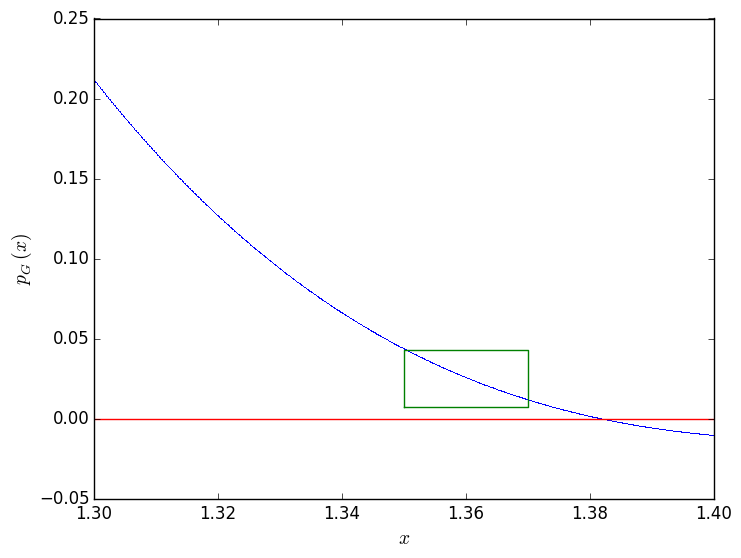

In [21]:
xlabel(L"x", size=14)
ylabel(L"p_G(x)", size=14)
plot_f_interval(gritton_pol, Interval(1.3,1.4), 1000)
plot([1.3,1.4], [0.0,0.0], "r-")
plot([xI.lo,xI.lo, xI.hi, xI.hi, xI.lo], 
     [p5_approx.lo, p5_approx.hi, p5_approx.hi, p5_approx.lo, p5_approx.lo], "g-");

### Dependence on the order of the Taylor expansion

The question addressed here (which does not appear in the talk) is whether we may improve the bounds by considering higher order Taylor expansions. In other words, how the resulting Taylor model interval depends on the degree of the polynomial expansion?

In [22]:
"""Returns the interval bounding the range of `f`, in the interval `xI`,
using a validated Taylor expansion of order `ord_app`."""
function taylor_model(f::Function, xI::Interval, ord_app::Int)
    xmid = mid(xI)
    # Validated(?) Taylor approximation
    f_int = f(@interval(xmid)+taylor1_variable(ord_app))
    T_app = evaluate( f_int, xI-xmid)
    # Interval bounding the truncation errors
    f_int = f(xI + taylor1_variable(ord_app+1))
    err_app = get_coeff( f_int, ord_app+1)
    err_app = err_app * (xI-xmid)^(ord_app+1)
    
    return T_app + err_app
end

taylor_model (generic function with 1 method)

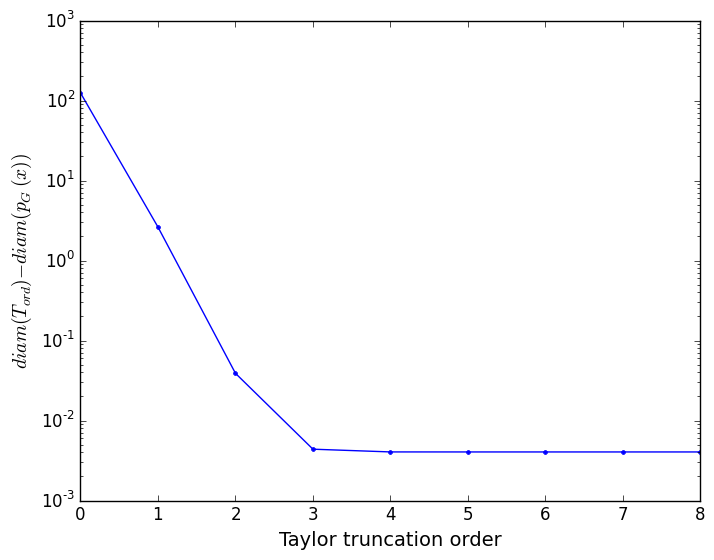

In [23]:
xlabel("Taylor truncation order", size=14)
ylabel(L"{diam}(T_{ord})-{diam}(p_G(x))", size=14)
tm_test = map( nn -> diam(taylor_model(gritton_pol, xI, nn))-diam(p_bounds), 0:8)
semilogy(tm_test,".-");

In [24]:
map( nn -> taylor_model(gritton_pol, xI, nn), 0:8)

9-element Array{ValidatedNumerics.Interval{Float64},1}:
 [-62.28916701309278, 62.33943738178171]        
  [-1.2904285767392953, 1.3610688465739718]     
  [-0.010205082357992008, 0.06047545104691966]  
   [0.007049045071436859, 0.043223641078669175] 
   [0.007213713787503604, 0.043056654901424046] 
   [0.007214936784639465, 0.04305543070008085]  
   [0.0072149438874300675, 0.043055424801497585]
   [0.007214943920839725, 0.0430554247682073]   
   [0.007214943920850651, 0.043055424768077]    

### Roots of Gritton's polynomial

Let us use what we already have already implemented in "ValidatedNumerics.jl", and compute the
roots of Gritton's polynomial.

In [25]:
# For compilation
@time newton(x->x-1, Interval(-2.0,2.0))

1-element Array{ValidatedNumerics.Root{Float64},1}:
 Root([1.0, 1.0], :unique)

In [28]:
@time newton(gritton_pol,Interval(-12.0,8.0));

  7.786936 seconds (58.48 M allocations: 1.573 GB, 5.79% gc time)


In [85]:
methods(newton)

# 6 methods for generic function "newton":
newton{T}(f::Function, f_prime::Function, x::ValidatedNumerics.Interval{T}) at /Users/blaskolic/.julia/v0.4/ValidatedNumerics/src/root_finding/newton.jl:64
newton{T}(f::Function, f_prime::Function, x::ValidatedNumerics.Interval{T}, level::Int64) at /Users/blaskolic/.julia/v0.4/ValidatedNumerics/src/root_finding/newton.jl:64
newton{T}(f::Function, x::ValidatedNumerics.Interval{T}) at /Users/blaskolic/.julia/v0.4/ValidatedNumerics/src/root_finding/newton.jl:137
newton{T}(f::Function, f_prime::Function, xx::Array{ValidatedNumerics.Interval{T},1}) at /Users/blaskolic/.julia/v0.4/ValidatedNumerics/src/root_finding/newton.jl:142
newton{T}(f::Function, xx::Array{ValidatedNumerics.Interval{T},1}, level) at /Users/blaskolic/.julia/v0.4/ValidatedNumerics/src/root_finding/newton.jl:146
newton{T}(f::Function, xx::Array{ValidatedNumerics.Root{T},1}) at /Users/blaskolic/.julia/v0.4/ValidatedNumerics/src/root_finding/newton.jl:150

In [105]:
sin(ValidatedNumerics.Jet(3.1415962,3.145))

ValidatedNumerics.Jet{Float64}(-3.5464102067039848e-6,-3.1449999999802225)

So, it seems that, despite all the complications, we do get *all* 18 roots properly, and within a reasonable time.

In [30]:
# For compilation
@time krawczyk(x->x-1, Interval(-2.0,2.0))

1-element Array{ValidatedNumerics.Root{Float64},1}:
 Root([1.0, 1.0], :unique)

0.186045 seconds (131.92 k allocations: 5.962 MB)


In [33]:
@time krawczyk(gritton_pol,Interval(-12.0,8.0));

 13.338914 seconds (99.69 M allocations: 2.670 GB, 5.97% gc time)


In [32]:
ans

18-element Array{ValidatedNumerics.Root{Float64},1}:
 Root([-11.09298925857108, -11.092989258571064], :unique)   
 Root([-6.242206062881782, -6.242206062881754], :unique)    
 Root([-4.990081472925714, -4.990081472925682], :unique)    
 Root([-3.691103192561981, -3.6911031925619713], :unique)   
 Root([-1.942591312150229, -1.942591312150227], :unique)    
 Root([-0.33237615420629324, -0.3323761542062923], :unique) 
 Root([-0.27746547288962636, -0.27746547288962575], :unique)
 Root([0.8459546664680279, 0.8459546664681231], :unique)    
 Root([1.381098858805655, 1.3810988589429898], :unique)     
 Root([1.4799484845558426, 1.47994848512911], :unique)      
 Root([1.5935961615396912, 1.5935961624058959], :unique)    
 Root([1.7520425359321339, 1.752042536750461], :unique)     
 Root([1.9669362119351448, 1.9669362123465397], :unique)    
 Root([2.285954643776273, 2.2859546439464458], :unique)     
 Root([2.741429805284924, 2.741429805325737], :unique)      
 Root([3.5414667206451416, 3.541

.365062 seconds (99.70 M allocations: 2.670 GB, 5.77% gc time)
